<a href="https://colab.research.google.com/github/chandrajitpal/Cybersecurity/blob/main/cyberlabs/LAB6_CYBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fraud Prediction Using Skewed Data**

How do we achieve good predictive power in the statistical model? Can sampling techniques help? Let's find out!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


# Load the data.
df_data_2 = pd.read_csv('/content/drive/My Drive/PICTURES_CYBER/creditcard.csv', header = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df_data_2

In [12]:
print("Time")
print(df.Time.describe())
print("V1")
print(df.Time.describe())
print("Amount")
print(df.Amount.describe())
print("Class")
print(df.Class.describe())
print(df.Class.nunique())
print("ALL")
print(df.describe())

Time
count     56874.000000
mean      94995.469934
std       47535.817923
min          10.000000
25%       54380.250000
50%       84664.500000
75%      139664.500000
max      172782.000000
Name: Time, dtype: float64
V1
count     56874.000000
mean      94995.469934
std       47535.817923
min          10.000000
25%       54380.250000
50%       84664.500000
75%      139664.500000
max      172782.000000
Name: Time, dtype: float64
Amount
count    56874.000000
mean        88.264681
std        233.922284
min          0.000000
25%          5.740000
50%         22.205000
75%         78.600000
max       7862.390000
Name: Amount, dtype: float64
Class
count    56874.000000
mean         0.001793
std          0.042311
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64
2
ALL
                Time            V1            V2            V3            V4  \
count   56874.000000  56874.000000  56874.000000  56874.000000

<Axes: >

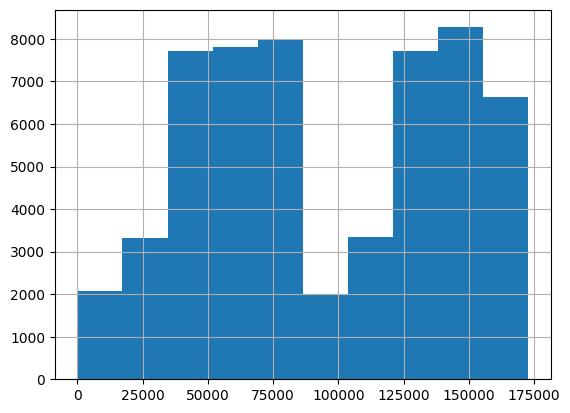

In [13]:
df.Time.hist()


<Axes: >

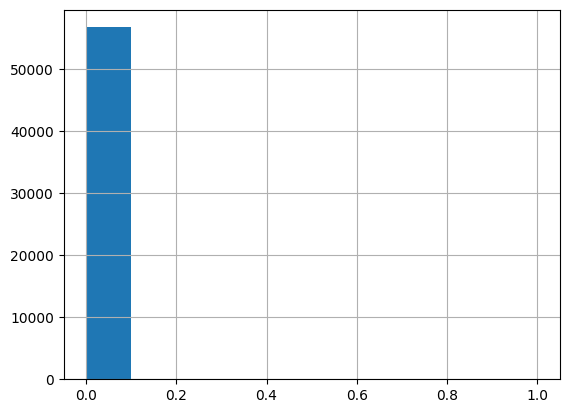

In [14]:

df.Class.hist()


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

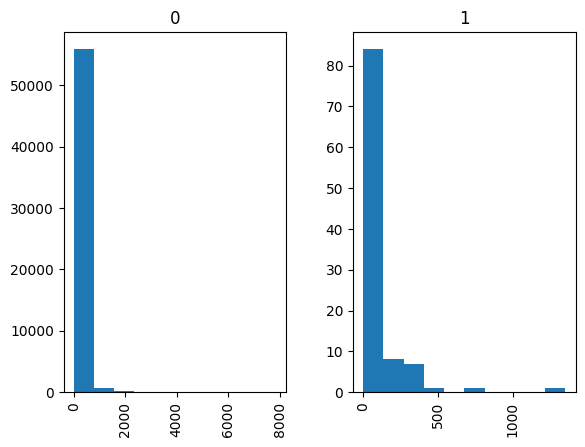

In [15]:
df['Amount'].hist(by=df['Class'])

In [16]:
print(df.groupby('Class').size())

Class
0    56772
1      102
dtype: int64


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

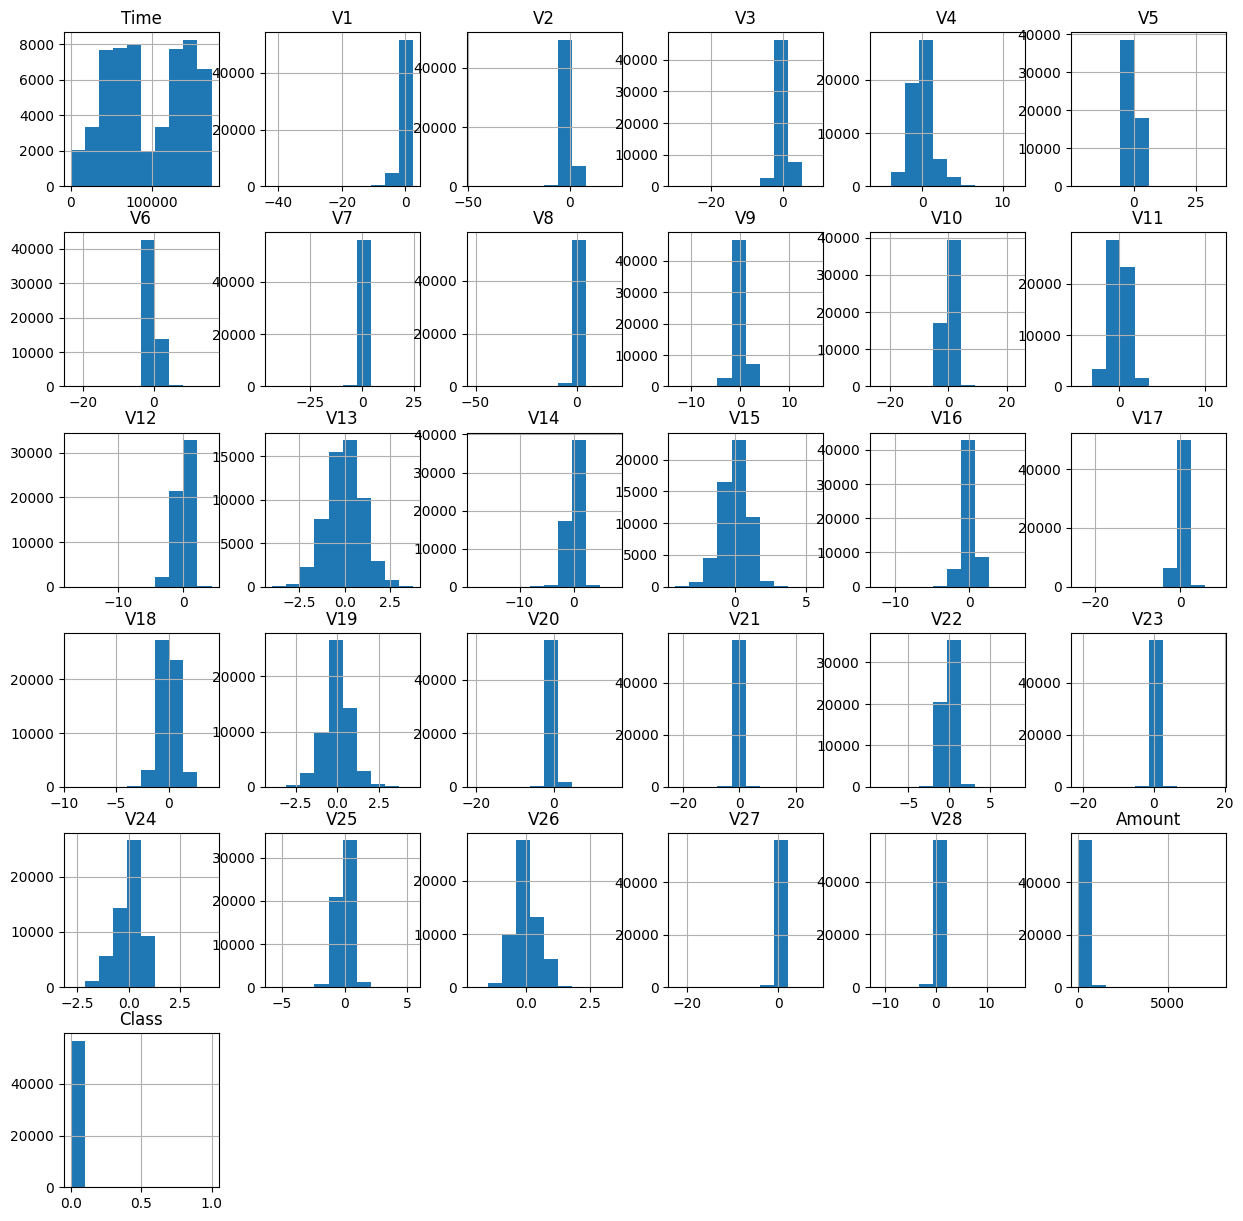

In [17]:


df.hist(figsize=(15,15))



V9 - V10


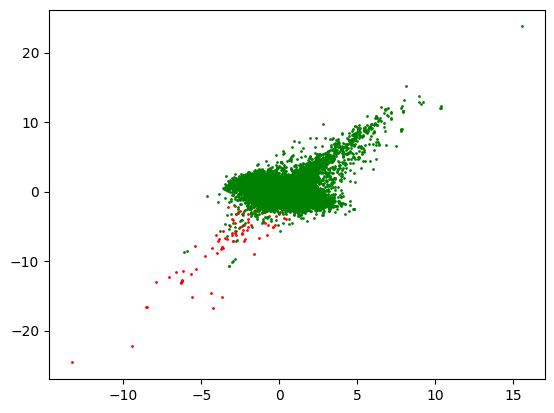

<Figure size 640x480 with 0 Axes>

In [18]:
sample = df[df['Class']==0]
fraud = df[df['Class']==1]
print('V9 - V10')
plt.scatter(fraud['V9'], fraud['V10'],s=1, color='r')
plt.scatter(sample['V9'], sample['V10'], s=1, color='g')
plt.show()
plt.clf()

V16-V17


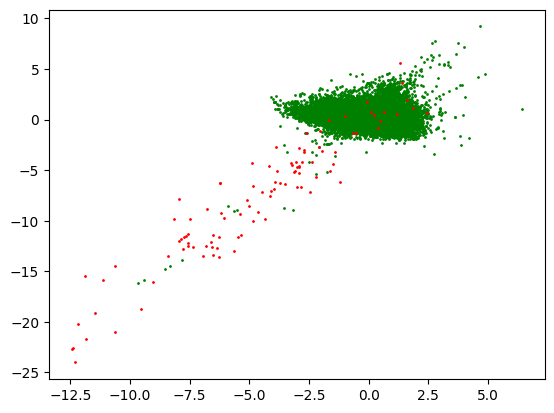

<Figure size 640x480 with 0 Axes>

In [19]:


print('V16-V17')
plt.scatter(sample['V16'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V16'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()



V17 - V18


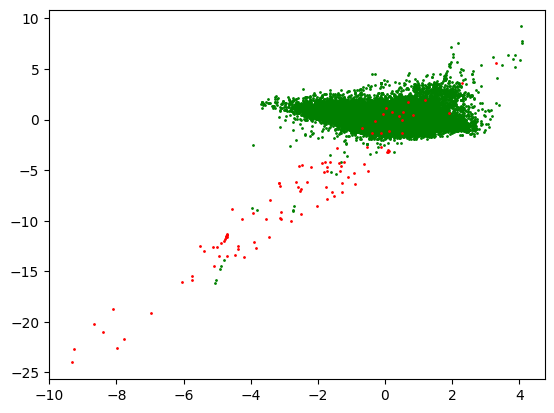

<Figure size 640x480 with 0 Axes>

In [20]:
print('V17 - V18')
plt.scatter(sample['V18'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V18'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()


V1 - V3


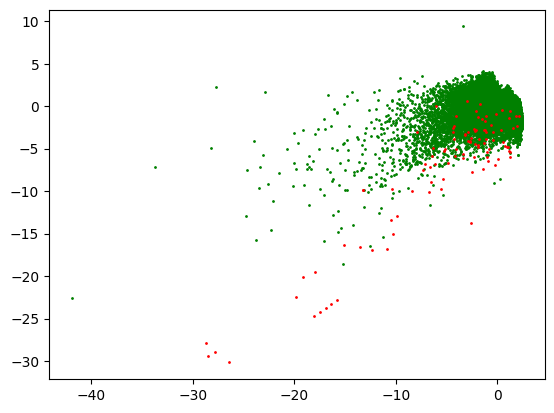

<Figure size 640x480 with 0 Axes>

In [21]:
print('V1 - V3')
plt.scatter(sample['V1'], sample['V3'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V3'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V2


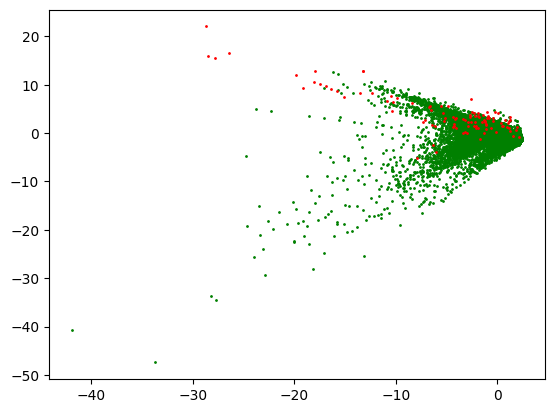

<Figure size 640x480 with 0 Axes>

In [22]:
print('V1 - V2')
plt.scatter(sample['V1'], sample['V2'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V2'], s=1, color = 'r')
plt.show()
plt.clf()

In [23]:
# Split The Data with all variables

from sklearn.model_selection import train_test_split

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(39811, 30)
xtest shape
(17063, 30)


In [24]:
# RF Classifier explained

'''rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)
n_estimators : integer, optional (default=10)
The number of trees in the forest.
oob_score : bool (default=False)
Whether to use out-of-bag samples to estimate the generalization accuracy.
n_jobs : integer, optional (default=1)
The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[17027     3]
 [    6    27]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.90      0.82      0.86        33

    accuracy                           1.00     17063
   macro avg       0.95      0.91      0.93     17063
weighted avg       1.00      1.00      1.00     17063

Accuracy : 0.999473
Area under the curve : 0.909003


In [25]:


# GBM Classifier explained

'''params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble. GradientBoostingClassifier(**params)
n_estimators : int (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in better performance.
max_depth: integer, optional (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. The best value depends on the interaction of the input variables.
subsample: float, optional (default=1.0)
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
learning_rate : float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
'''

from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))



confusion matrix
[[17025     5]
 [   10    23]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.82      0.70      0.75        33

    accuracy                           1.00     17063
   macro avg       0.91      0.85      0.88     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9991209048819082
Area under the curve : 0.848338


In [31]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()


# List the default parameters.
print(xgb_model.get_xgb_params())

# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_set=[((xtrain, ytrain)),(xtest, ytest)])

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
[0]	validation_0-logloss:0.03493	validation_1-logloss:0.03479
[1]	validation_0-logloss:0.00886	validation_1-logloss:0.00846
[2]	validation_0-logloss:0.00667	validation_1-logloss:0.00641
[3]	validation_0-logloss:0.00524	validation_1-logloss:0.00520
[4]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17028     2]
 [    8    25]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.93      0.76      0.83        33

    accuracy                           1.00     17063
   macro avg       0.96      0.88      0.92     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9994139365879389
Area under the curve : 0.878729


In [33]:
# Split The Data with few variables

from sklearn.model_selection import train_test_split

x = df[['V9', 'V10','V16', 'V17', 'V18', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(39811, 6)
xtest shape
(17063, 6)


In [34]:


'''Random Forest Classifier on reduced dimensions data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))



model
RandomForestClassifier()
confusion matrix
[[17027     3]
 [    6    27]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.90      0.82      0.86        33

    accuracy                           1.00     17063
   macro avg       0.95      0.91      0.93     17063
weighted avg       1.00      1.00      1.00     17063

Accuracy : 0.999473
Area under the curve : 0.909003


In [35]:


'''Gradient Boost Algorithm on reduced dimensions data'''

from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))



confusion matrix
[[17023     7]
 [    8    25]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.78      0.76      0.77        33

    accuracy                           1.00     17063
   macro avg       0.89      0.88      0.88     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9991209048819082
Area under the curve : 0.878582


In [36]:
'''Extreme Gradient Boost Algorithm on reduced dimensions data'''

from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()
# List the default parameters.
print(xgb_model.get_xgb_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [38]:
# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-logloss:0.03177	validation_1-logloss:0.03483
[1]	validation_0-logloss:0.01106	validation_1-logloss:0.01178
[2]	validation_0-logloss:0.00819	validation_1-logloss:0.00871
[3]	validation_0-logloss:0.00640	validation_1-logloss:0.00686
[4]	validation_0-logloss:0.00520	validation_1-logloss:0.00561
[5]	validation_0-logloss:0.00433	validation_1-logloss:0.00469
[6]	validation_0-logloss:0.00369	validation_1-logloss:0.00410
[7]	validation_0-logloss:0.00324	validation_1-logloss:0.00362
[8]	validation_0-logloss:0.00290	validation_1-logloss:0.00331
[9]	validation_0-logloss:0.00263	validation_1-logloss:0.00307
[10]	validation_0-logloss:0.00242	validation_1-logloss:0.00285
[11]	validation_0-logloss:0.00223	validation_1-logloss:0.00273
[12]	validation_0-logloss:0.00206	validation_1-logloss:0.00263
[13]	validation_0-logloss:0.00191	validation_1-logloss:0.00264
[14]	validation_0-logloss:0.00178	validation_1-logloss:0.00263
[15]	validation_0-logloss:0.00168	validation_1-logloss:0.00266
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [39]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17029     1]
 [    6    27]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17030
           1       0.96      0.82      0.89        33

    accuracy                           1.00     17063
   macro avg       0.98      0.91      0.94     17063
weighted avg       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.9995897556115572
Area under the curve : 0.909062


In [43]:
'''We are taking 10% of non frauds and merge it with frauds data'''

df = df[['Class', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]


sample = df[df['Class']==0]
fraud = df[df['Class'] == 1]

# random sampling
ignore_me, sample = train_test_split(sample, test_size = 0.1)

import warnings
warnings.filterwarnings("ignore")

sample = pd.concat([sample, fraud])

# Split into train and test units.
xtrain, xtest = train_test_split(sample, test_size = 0.3)
ytrain = xtrain['Class']
ytest = xtest['Class']
xtrain.drop(columns=['Class'], inplace = True)
xtest.drop(columns=['Class'], inplace = True)




'''Random Forest Classifier on undersampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier()
confusion matrix
[[1702    0]
 [   3   29]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1702
           1       1.00      0.91      0.95        32

    accuracy                           1.00      1734
   macro avg       1.00      0.95      0.97      1734
weighted avg       1.00      1.00      1.00      1734

Accuracy : 0.998270
Area under the curve : 0.953125


In [44]:
'''Gradient Boost Algorithm on undersampled data'''

from sklearn import ensemble

params = {'n_estimators': 650, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[1702    0]
 [   3   29]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1702
           1       1.00      0.91      0.95        32

    accuracy                           1.00      1734
   macro avg       1.00      0.95      0.97      1734
weighted avg       1.00      1.00      1.00      1734

-----------------------------------------------------------------------------------------
Accuracy is :
0.9982698961937716
Area under the curve : 0.953125


In [45]:


'''Extreme Gradient Boost Algorithm on reduced dimensions data'''

from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())



{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [47]:
# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-logloss:0.03787	validation_1-logloss:0.04015
[1]	validation_0-logloss:0.02651	validation_1-logloss:0.02993
[2]	validation_0-logloss:0.02111	validation_1-logloss:0.02506
[3]	validation_0-logloss:0.01758	validation_1-logloss:0.02247
[4]	validation_0-logloss:0.01504	validation_1-logloss:0.02115
[5]	validation_0-logloss:0.01265	validation_1-logloss:0.02031
[6]	validation_0-logloss:0.01081	validation_1-logloss:0.01982
[7]	validation_0-logloss:0.00942	validation_1-logloss:0.01972
[8]	validation_0-logloss:0.00815	validation_1-logloss:0.01949
[9]	validation_0-logloss:0.00714	validation_1-logloss:0.01931
[10]	validation_0-logloss:0.00628	validation_1-logloss:0.01974
[11]	validation_0-logloss:0.00562	validation_1-logloss:0.01997
[12]	validation_0-logloss:0.00504	validation_1-logloss:0.01974
[13]	validation_0-logloss:0.00462	validation_1-logloss:0.01990
[14]	validation_0-logloss:0.00412	validation_1-logloss:0.02014
[15]	validation_0-logloss:0.00376	validation_1-logloss:0.02045
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [48]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[1700    2]
 [   6   26]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1702
           1       0.93      0.81      0.87        32

    accuracy                           1.00      1734
   macro avg       0.96      0.91      0.93      1734
weighted avg       1.00      1.00      1.00      1734

-----------------------------------------------------------------------------------------
Accuracy is :
0.9953863898500577
Area under the curve : 0.905662


In [52]:
!pip install imblearn

from collections import Counter
from imblearn.over_sampling import SMOTE

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

'''Increase the fraud samples from 102 to 500'''

sm = SMOTE(random_state=42,sampling_strategy={1:500})
X_res, y_res = sm.fit_resample(x, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 56772, 1: 500})


In [53]:
'''Split the resampled data into train & test data with 70:30 mix'''

xtrain, xtest, ytrain, ytest = train_test_split(X_res, y_res, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(40090, 30)
xtest shape
(17182, 30)


In [54]:


'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))



model
RandomForestClassifier()
confusion matrix
[[17020     3]
 [   12   147]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17023
           1       0.98      0.92      0.95       159

    accuracy                           1.00     17182
   macro avg       0.99      0.96      0.98     17182
weighted avg       1.00      1.00      1.00     17182

Accuracy : 0.999127
Area under the curve : 0.962176


In [55]:
'''Gradient Boost Algorithm on resampled data'''

from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17016     7]
 [   16   143]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17023
           1       0.95      0.90      0.93       159

    accuracy                           1.00     17182
   macro avg       0.98      0.95      0.96     17182
weighted avg       1.00      1.00      1.00     17182

-----------------------------------------------------------------------------------------
Accuracy is :
0.9986613898265627
Area under the curve : 0.949480


In [56]:
'''Extreme Gradient Boost Algorithm on reduced dimensions data'''

from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [58]:
# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-logloss:0.04682	validation_1-logloss:0.05681
[1]	validation_0-logloss:0.02425	validation_1-logloss:0.02660
[2]	validation_0-logloss:0.01795	validation_1-logloss:0.02148
[3]	validation_0-logloss:0.01216	validation_1-logloss:0.01425
[4]	validation_0-logloss:0.00868	validation_1-logloss:0.00988
[5]	validation_0-logloss:0.00692	validation_1-logloss:0.00824
[6]	validation_0-logloss:0.00564	validation_1-logloss:0.00708
[7]	validation_0-logloss:0.00465	validation_1-logloss:0.00608
[8]	validation_0-logloss:0.00397	validation_1-logloss:0.00543
[9]	validation_0-logloss:0.00333	validation_1-logloss:0.00485
[10]	validation_0-logloss:0.00274	validation_1-logloss:0.00442
[11]	validation_0-logloss:0.00238	validation_1-logloss:0.00402
[12]	validation_0-logloss:0.00209	validation_1-logloss:0.00376
[13]	validation_0-logloss:0.00183	validation_1-logloss:0.00357
[14]	validation_0-logloss:0.00164	validation_1-logloss:0.00336
[15]	validation_0-logloss:0.00146	validation_1-logloss:0.00311
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17021     2]
 [    8   151]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17023
           1       0.99      0.95      0.97       159

    accuracy                           1.00     17182
   macro avg       0.99      0.97      0.98     17182
weighted avg       1.00      1.00      1.00     17182

-----------------------------------------------------------------------------------------
Accuracy is :
0.9994179955767664
Area under the curve : 0.974784
